#Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# install splitfolders to split dataset
! pip install split-folders
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Select .json location
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tubes ML"

In [4]:
#command api kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:05<00:00, 41.7MB/s]
100% 163M/163M [00:05<00:00, 33.2MB/s]


In [5]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

#Pre-processing

In [6]:
%cd /content/
%mkdir dataset

/content


In [7]:
#splitting dataset to 3 dir with 80,10,10 -> train, val, test
data_dir = '/content/data'
output = '/content/dataset'
splitfolders.ratio(data_dir, output=output, seed=42, ratio=(.8, .1, .1)) 
# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example

Copying files: 7553 files [00:01, 5814.23 files/s]


In [8]:
# create train, val, test paths
train_dir = os.path.join('/content/dataset/train')
validation_dir = os.path.join('/content/dataset/val')
test_dir= os.path.join('/content/dataset/test')

In [9]:
mask_train_path = train_dir + '/with_mask'
nomask_train_pat = train_dir + '/without_mask'
mask_val_path = validation_dir + '/with_mask'
nomask_val_path = validation_dir + '/without_mask'
mask_test_path = test_dir + '/with_mask'
nomask_test_path = test_dir + '/without_mask'

mask_len_train = len(os.listdir(mask_train_path))
nomask_len_train = len(os.listdir(nomask_train_pat))
mask_len_val = len(os.listdir(mask_val_path))
nomask_len_val = len(os.listdir(nomask_val_path))
mask_len_test = len(os.listdir(mask_test_path))
nomask_len_test = len(os.listdir(nomask_test_path))

print("jumlah dataset Training : ", mask_len_train + nomask_len_train)
print("jumlah dataset Validasi : ", mask_len_val + nomask_len_val)
print("jumlah dataset Test     : ", mask_len_test + nomask_len_test)
print("jumlah total Dataset    : ", mask_len_train + nomask_len_train + mask_len_val + nomask_len_val + mask_len_test + nomask_len_test)
print("\n\n")
print("jumlah train kelas Mask : ", mask_len_train)
print("jumlah train kelas No Mask : ", nomask_len_train)
print("jumlah validasi kelas Mask : ", mask_len_val)
print("jumlah validasi kelas No Mask : ", nomask_len_val)
print("jumlah test kelas Mask : ", mask_len_test)
print("jumlah test kelas No Mask : ", nomask_len_test)

jumlah dataset Training :  6042
jumlah dataset Validasi :  754
jumlah dataset Test     :  757
jumlah total Dataset    :  7553



jumlah train kelas Mask :  2980
jumlah train kelas No Mask :  3062
jumlah validasi kelas Mask :  372
jumlah validasi kelas No Mask :  382
jumlah test kelas Mask :  373
jumlah test kelas No Mask :  384


#Augmentation Dataset

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6042 images belonging to 2 classes.
Found 754 images belonging to 2 classes.


#Hyper Parameter Setup and Compile Model

In [12]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [13]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
def exponential_decay(lr0, s):
     def exponential_decay_fn(epoch):
         return lr0 * 0.1 **(epoch / s)
     return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)
lr_scheduler = LearningRateScheduler(exponential_decay_fn)

In [14]:
#optimizer
tagetdir = '/content/gdrive/MyDrive/Tubes ML/M4_Model1.h5'
savedir = tagetdir
callbacks = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [21]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
]

In [36]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
# compile model
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=METRICS)

#Model

In [15]:
# build a simple model
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 256)       2

In [23]:
# training & saving history of every epoch
history = model.fit_generator(
      train_generator,
      steps_per_epoch=302,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=37,  #  images = batch_size * steps
      callbacks = [callbacks, best_model,lr_scheduler])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


  9/302 [..............................] - ETA: 51s - loss: 1.1833 - accuracy: 0.5556 - precision: 0.5619 - recall: 0.6344

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


302/302 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.6790 - precision: 0.6829 - recall: 0.6845
Epoch 1: val_accuracy improved from -inf to 0.75811, saving model to /content/gdrive/MyDrive/Tubes ML/M4_Model1.h5
302/302 [==============================] - 53s 170ms/step - loss: 0.6917 - accuracy: 0.6790 - precision: 0.6829 - recall: 0.6845 - val_loss: 0.5045 - val_accuracy: 0.7581 - val_precision: 0.6822 - val_recall: 0.9787 - lr: 0.0100
Epoch 2/100
302/302 [==============================] - ETA: 0s - loss: 0.4717 - accuracy: 0.7982 - precision: 0.8114 - recall: 0.7840
Epoch 2: val_accuracy did not improve from 0.75811
302/302 [==============================] - 52s 171ms/step - loss: 0.4717 - accuracy: 0.7982 - precision: 0.8114 - recall: 0.7840 - val_loss: 0.9091 - val_accuracy: 0.6622 - val_precision: 0.6000 - val_recall: 0.9947 - lr: 0.0089
Epoch 3/100
302/302 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.7833 - precision: 0.7909 - r

#Evaluasi Model1 

In [24]:
import pandas as pd
#Dataframe capturing the accuracy and loss per epoch
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,lr
0,0.691725,0.679010,0.682903,0.684469,0.504526,0.758108,0.682156,0.978667,0.010000
1,0.471705,0.798240,0.811398,0.784005,0.909149,0.662162,0.600000,0.994652,0.008913
2,0.473108,0.783295,0.790945,0.778251,0.300302,0.875676,0.866841,0.890080,0.007943
3,0.411398,0.825307,0.844192,0.803214,0.411505,0.813514,0.737805,0.975806,0.007079
4,0.386415,0.836599,0.849069,0.823433,0.296988,0.867568,0.816514,0.951872,0.006310
...,...,...,...,...,...,...,...,...,...
58,0.233392,0.911491,0.911890,0.913386,0.141499,0.955405,0.947644,0.965333,0.000013
59,0.235212,0.908502,0.908557,0.911235,0.142542,0.955405,0.950131,0.962766,0.000011
60,0.232885,0.907340,0.910016,0.907038,0.137038,0.954054,0.949735,0.959893,0.000010
61,0.238519,0.909665,0.914957,0.905963,0.141460,0.955405,0.950131,0.962766,0.000009


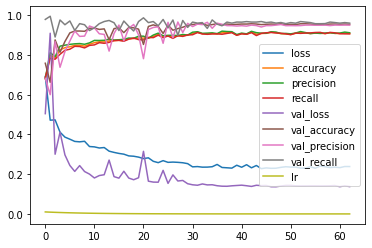

In [25]:
history_df.plot();

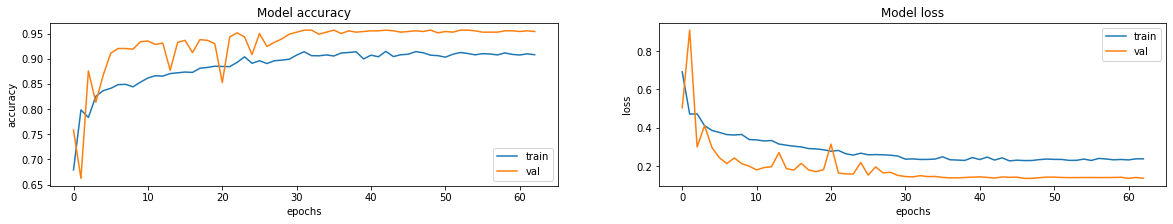

In [26]:
# loss plot
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [28]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Tubes ML/M4_Model1.h5'
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.9511228533685601
Precision : 0.9512902887305618
f1Score : 0.9511252416430673
[[358  15]
 [ 22 362]]


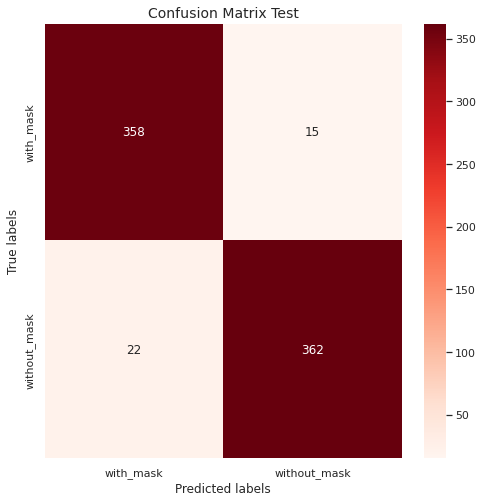

In [29]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= 'binary',
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

#Model2

In [33]:
#optimizer
tagetdir = '/content/gdrive/MyDrive/Tubes ML/M4_Model2.h5'
savedir = tagetdir
callbacks = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [34]:
# build a simple model
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 33, 33, 128)      

In [42]:
# training & saving history of every epoch
history = model.fit_generator(
      train_generator,
      steps_per_epoch=302,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=37,  #  images = batch_size * steps
      callbacks = [callbacks, best_model,lr_scheduler])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


230/302 [=====================>........] - ETA: 11s - loss: 0.4989 - accuracy: 0.7833 - precision: 0.7978 - recall: 0.7631

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


302/302 [==============================] - ETA: 0s - loss: 0.4942 - accuracy: 0.7864 - precision: 0.8012 - recall: 0.7686
Epoch 1: val_accuracy did not improve from 0.74595
302/302 [==============================] - 49s 161ms/step - loss: 0.4942 - accuracy: 0.7864 - precision: 0.8012 - recall: 0.7686 - val_loss: 0.6265 - val_accuracy: 0.7041 - val_precision: 0.6331 - val_recall: 0.9893 - lr: 0.0100
Epoch 2/100
302/302 [==============================] - ETA: 0s - loss: 0.4353 - accuracy: 0.8125 - precision: 0.8228 - recall: 0.8031
Epoch 2: val_accuracy improved from 0.74595 to 0.86892, saving model to /content/gdrive/MyDrive/Tubes ML/M4_Model2.h5
302/302 [==============================] - 52s 173ms/step - loss: 0.4353 - accuracy: 0.8125 - precision: 0.8228 - recall: 0.8031 - val_loss: 0.2898 - val_accuracy: 0.8689 - val_precision: 0.9346 - val_recall: 0.7979 - lr: 0.0089
Epoch 3/100
302/302 [==============================] - ETA: 0s - loss: 0.4047 - accuracy: 0.8296 - precision: 0.8348 

#Evaluasi Model2

In [43]:
import pandas as pd
#Dataframe capturing the accuracy and loss per epoch
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,lr
0,0.494234,0.786450,0.801232,0.768625,0.626508,0.704054,0.633106,0.989333,0.010000
1,0.435327,0.812521,0.822759,0.803080,0.289772,0.868919,0.934579,0.797872,0.008913
2,0.404702,0.829625,0.834768,0.827100,0.590838,0.745946,0.984615,0.509284,0.007943
3,0.383356,0.843408,0.853831,0.833388,0.424314,0.787838,0.707224,0.992000,0.007079
4,0.359384,0.860179,0.855488,0.871190,0.300716,0.879730,0.961165,0.794118,0.006310
...,...,...,...,...,...,...,...,...,...
73,0.215511,0.920126,0.917586,0.925696,0.110843,0.958108,0.941026,0.978667,0.000002
74,0.219858,0.920790,0.918454,0.925974,0.114448,0.956757,0.940722,0.975936,0.000002
75,0.216025,0.922783,0.919559,0.928899,0.112167,0.956757,0.940104,0.975676,0.000002
76,0.215525,0.913982,0.912618,0.918006,0.112820,0.956757,0.940414,0.975806,0.000002


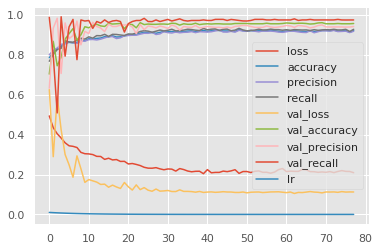

In [44]:
history_df.plot();

ValueError: ignored

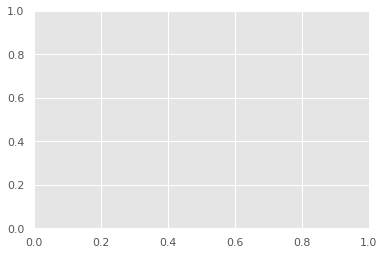

In [46]:
# loss plot
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [47]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [48]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Tubes ML/M4_Model2.h5'
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.9550858652575958
Precision : 0.9553029711191664
f1Score : 0.9550877463465842
[[360  13]
 [ 21 363]]


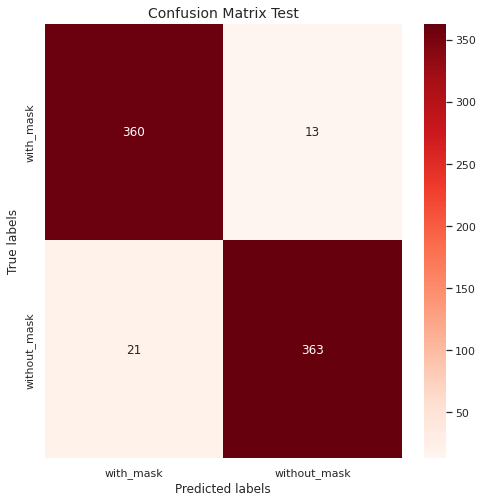

In [49]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= 'binary',
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()